In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
os.getcwd()

'D:\\AReM'

In [3]:
ls

 Volume in drive D is Data
 Volume Serial Number is 125B-8C1E

 Directory of D:\AReM

08-Jul-22  01:37 PM    <DIR>          .
05-Jul-22  06:45 PM    <DIR>          .ipynb_checkpoints
05-Jul-22  06:45 PM    <DIR>          bending1
06-Jul-22  07:57 PM    <DIR>          bending2
03-Jul-22  11:57 AM            21,207 bendingType.pdf
05-Jul-22  06:45 PM    <DIR>          cycling
03-Jul-22  11:57 AM            19,595 dataset4.csv
05-Jul-22  06:45 PM    <DIR>          lying
03-Jul-22  11:57 AM           105,307 sensorsPlacement.pdf
05-Jul-22  06:45 PM    <DIR>          sitting
05-Jul-22  06:45 PM    <DIR>          standing
05-Jul-22  06:45 PM    <DIR>          walking
08-Jul-22  01:37 PM         3,072,845 yo .ipynb
               4 File(s)      3,218,954 bytes
               9 Dir(s)  993,037,467,648 bytes free


In [4]:
lis = []
for i in os.listdir():
    lis.append(i)
lis.remove('.ipynb_checkpoints')
lis.remove('bendingType.pdf')
lis.remove('yo .ipynb')
lis.remove('sensorsPlacement.pdf')
lis.remove('dataset4.csv')
lis

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

In [5]:
def raw_str_gen(lis):
    data = []
    for i in lis:
        t = "D:\AReM"+ "\\"+i
        t = repr(t)[1:-1]
        for j in os.listdir(t):
            f = t +"\\\\"+j
            fd = pd.read_csv(f, skiprows=4,error_bad_lines=False)
            fd["col"] = i
            data.append(fd)
            del fd
    result = pd.concat(data)
    return result      

In [6]:
data = raw_str_gen(lis) 

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [7]:
data["col"].value_counts()

walking     7200
lying       7200
standing    7200
sitting     7199
cycling     7198
bending1    3360
bending2    2400
Name: col, dtype: int64

In [8]:
data.shape

(41757, 8)

In [9]:
data.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,col
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [10]:
#data[(data['# Columns: time'] == 121000)& (data['col']== 'sitting')]   

In [11]:
data.tail()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,col
475,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
477,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
478,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking
479,119750,32.67,3.09,18.67,0.47,14.00,3.16,walking


In [12]:
data.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'col'],
      dtype='object')

In [13]:
len(data)

41757

In [14]:
d = pd.read_csv(r"C:\Users\Mukul\Downloads\AReM\dataset4.csv",sep = " ", skiprows=5)

In [15]:
d.head()

,0,32.50,0.50,0.00,0.00.1,19.00,1.00,Unnamed: 7
0,250,32.50,0.50,0.0,0.0,18.50,0.50,NaN
1,500,32.75,0.43,1.0,0.0,18.00,0.00,NaN
2,750,32.50,0.50,0.0,0.0,17.50,0.50,NaN
3,1000,32.50,0.50,7.5,0.5,17.50,0.87,NaN
4,1250,32.67,0.47,11.0,1.0,16.75,0.83,NaN


In [16]:
d.drop( 'Unnamed: 7',axis = 1,inplace = True)

In [17]:
d.head()

,0,32.50,0.50,0.00,0.00.1,19.00,1.00
0,250,32.50,0.50,0.0,0.0,18.50,0.50
1,500,32.75,0.43,1.0,0.0,18.00,0.00
2,750,32.50,0.50,0.0,0.0,17.50,0.50
3,1000,32.50,0.50,7.5,0.5,17.50,0.87
4,1250,32.67,0.47,11.0,1.0,16.75,0.83


In [18]:
d.columns

Index(['0', '32.50', '0.50', '0.00', '0.00.1', '19.00', '1.00'], dtype='object')

In [19]:
t = list(d.columns)

In [20]:
ist = []
for i in t:
    if i == '0.00.1':
        i = float("0.00")
    else:
        i = float(i)
    ist.append(i)
ist        

[0.0, 32.5, 0.5, 0.0, 0.0, 19.0, 1.0]

In [21]:
g = pd.DataFrame(np.insert(d.values, 0, values=ist, axis=0))

In [22]:
g.columns = ['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']

In [23]:
g.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.0,32.50,0.50,0.0,0.0,19.0,1.00
1,250.0,32.50,0.50,0.0,0.0,18.5,0.50
2,500.0,32.75,0.43,1.0,0.0,18.0,0.00
3,750.0,32.50,0.50,0.0,0.0,17.5,0.50
4,1000.0,32.50,0.50,7.5,0.5,17.5,0.87


In [24]:
g['col'] = 'bending2'

In [25]:
 data = pd.concat([data,g])

In [26]:
data['col'].value_counts()

walking     7200
lying       7200
standing    7200
sitting     7199
cycling     7198
bending1    3360
bending2    2880
Name: col, dtype: int64

# About the data Set

Attribute Information:

For each sequence, data is provided in comma separated value (csv) format.

- Input data:
Input RSS streams are provided in files named datasetID.csv, where ID is the progressive numeric sequence ID for each repetition of the activity performed.
In each file, each row corresponds to a time step measurement (in temporal order) and contains the following information:
avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23
where avg and var are the mean and variance values over 250 ms of data, respectively.

- Target data:
Target data is provided as the containing folder name.

For each activity, we have the following parameters:
# Frequency (Hz): 20
# Clock (millisecond): 250
# Total duration (seconds): 120



In [27]:
data.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,col
0,0.0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250.0,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500.0,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750.0,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000.0,39.50,0.50,24.00,0.00,33.00,0.0,bending1


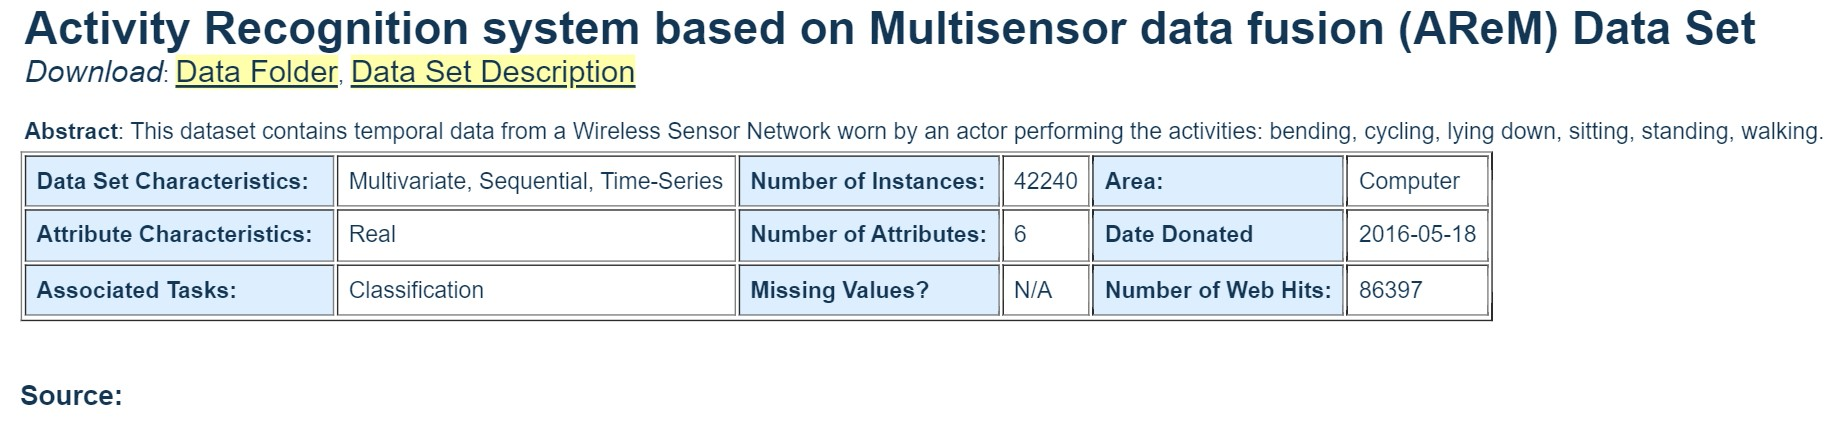

placements of sensors

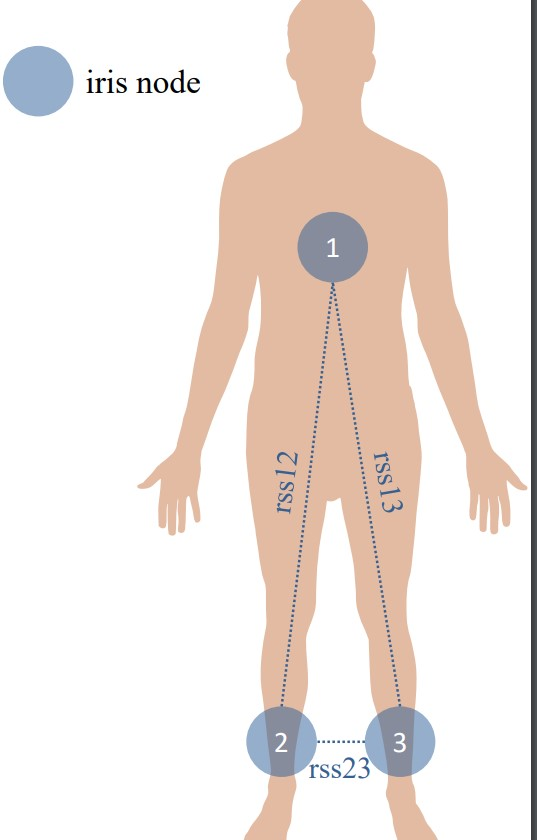

different types of sensor routes are stimulated when different activities are done

types of bending

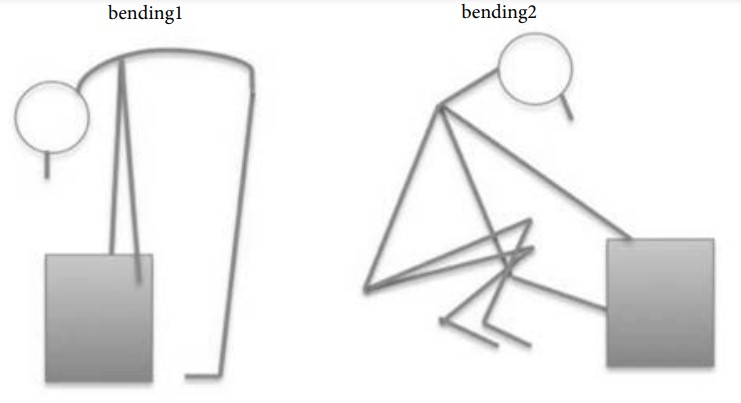

categorical columns

In [28]:
def find_catcol():
    num_cols = data._get_numeric_data().columns
    cate_cols = list(set(data.columns)-set(num_cols))
    return cate_cols
find_catcol()

['col']

number of unique values

In [29]:
df_cols = data.columns
def nunique():
    for i in df_cols:
          print(i , data[i].nunique())
nunique()

# Columns: time 480
avg_rss12 354
var_rss12 689
avg_rss13 304
var_rss13 488
avg_rss23 363
var_rss23 522
col 7


In [30]:
data.describe()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,42237.000000,42237.000000,42237.000000,42237.000000,42237.000000,42237.000000,42237.000000
mean,59873.262779,38.917394,1.459142,14.277895,1.502218,16.034921,1.620690
std,34639.395990,6.337385,2.048017,5.435382,1.639554,6.736081,1.637101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30000.000000,35.000000,0.400000,11.330000,0.430000,12.000000,0.470000
50%,59750.000000,39.750000,0.500000,15.000000,0.830000,16.000000,1.000000
75%,89750.000000,43.750000,1.790000,18.000000,2.290000,19.250000,2.290000
max,119750.000000,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


array([[<AxesSubplot:title={'center':'# Columns: time'}>,
        <AxesSubplot:title={'center':'avg_rss12'}>,
        <AxesSubplot:title={'center':'var_rss12'}>],
       [<AxesSubplot:title={'center':'avg_rss13'}>,
        <AxesSubplot:title={'center':'var_rss13'}>,
        <AxesSubplot:title={'center':'avg_rss23'}>],
       [<AxesSubplot:title={'center':'var_rss23'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

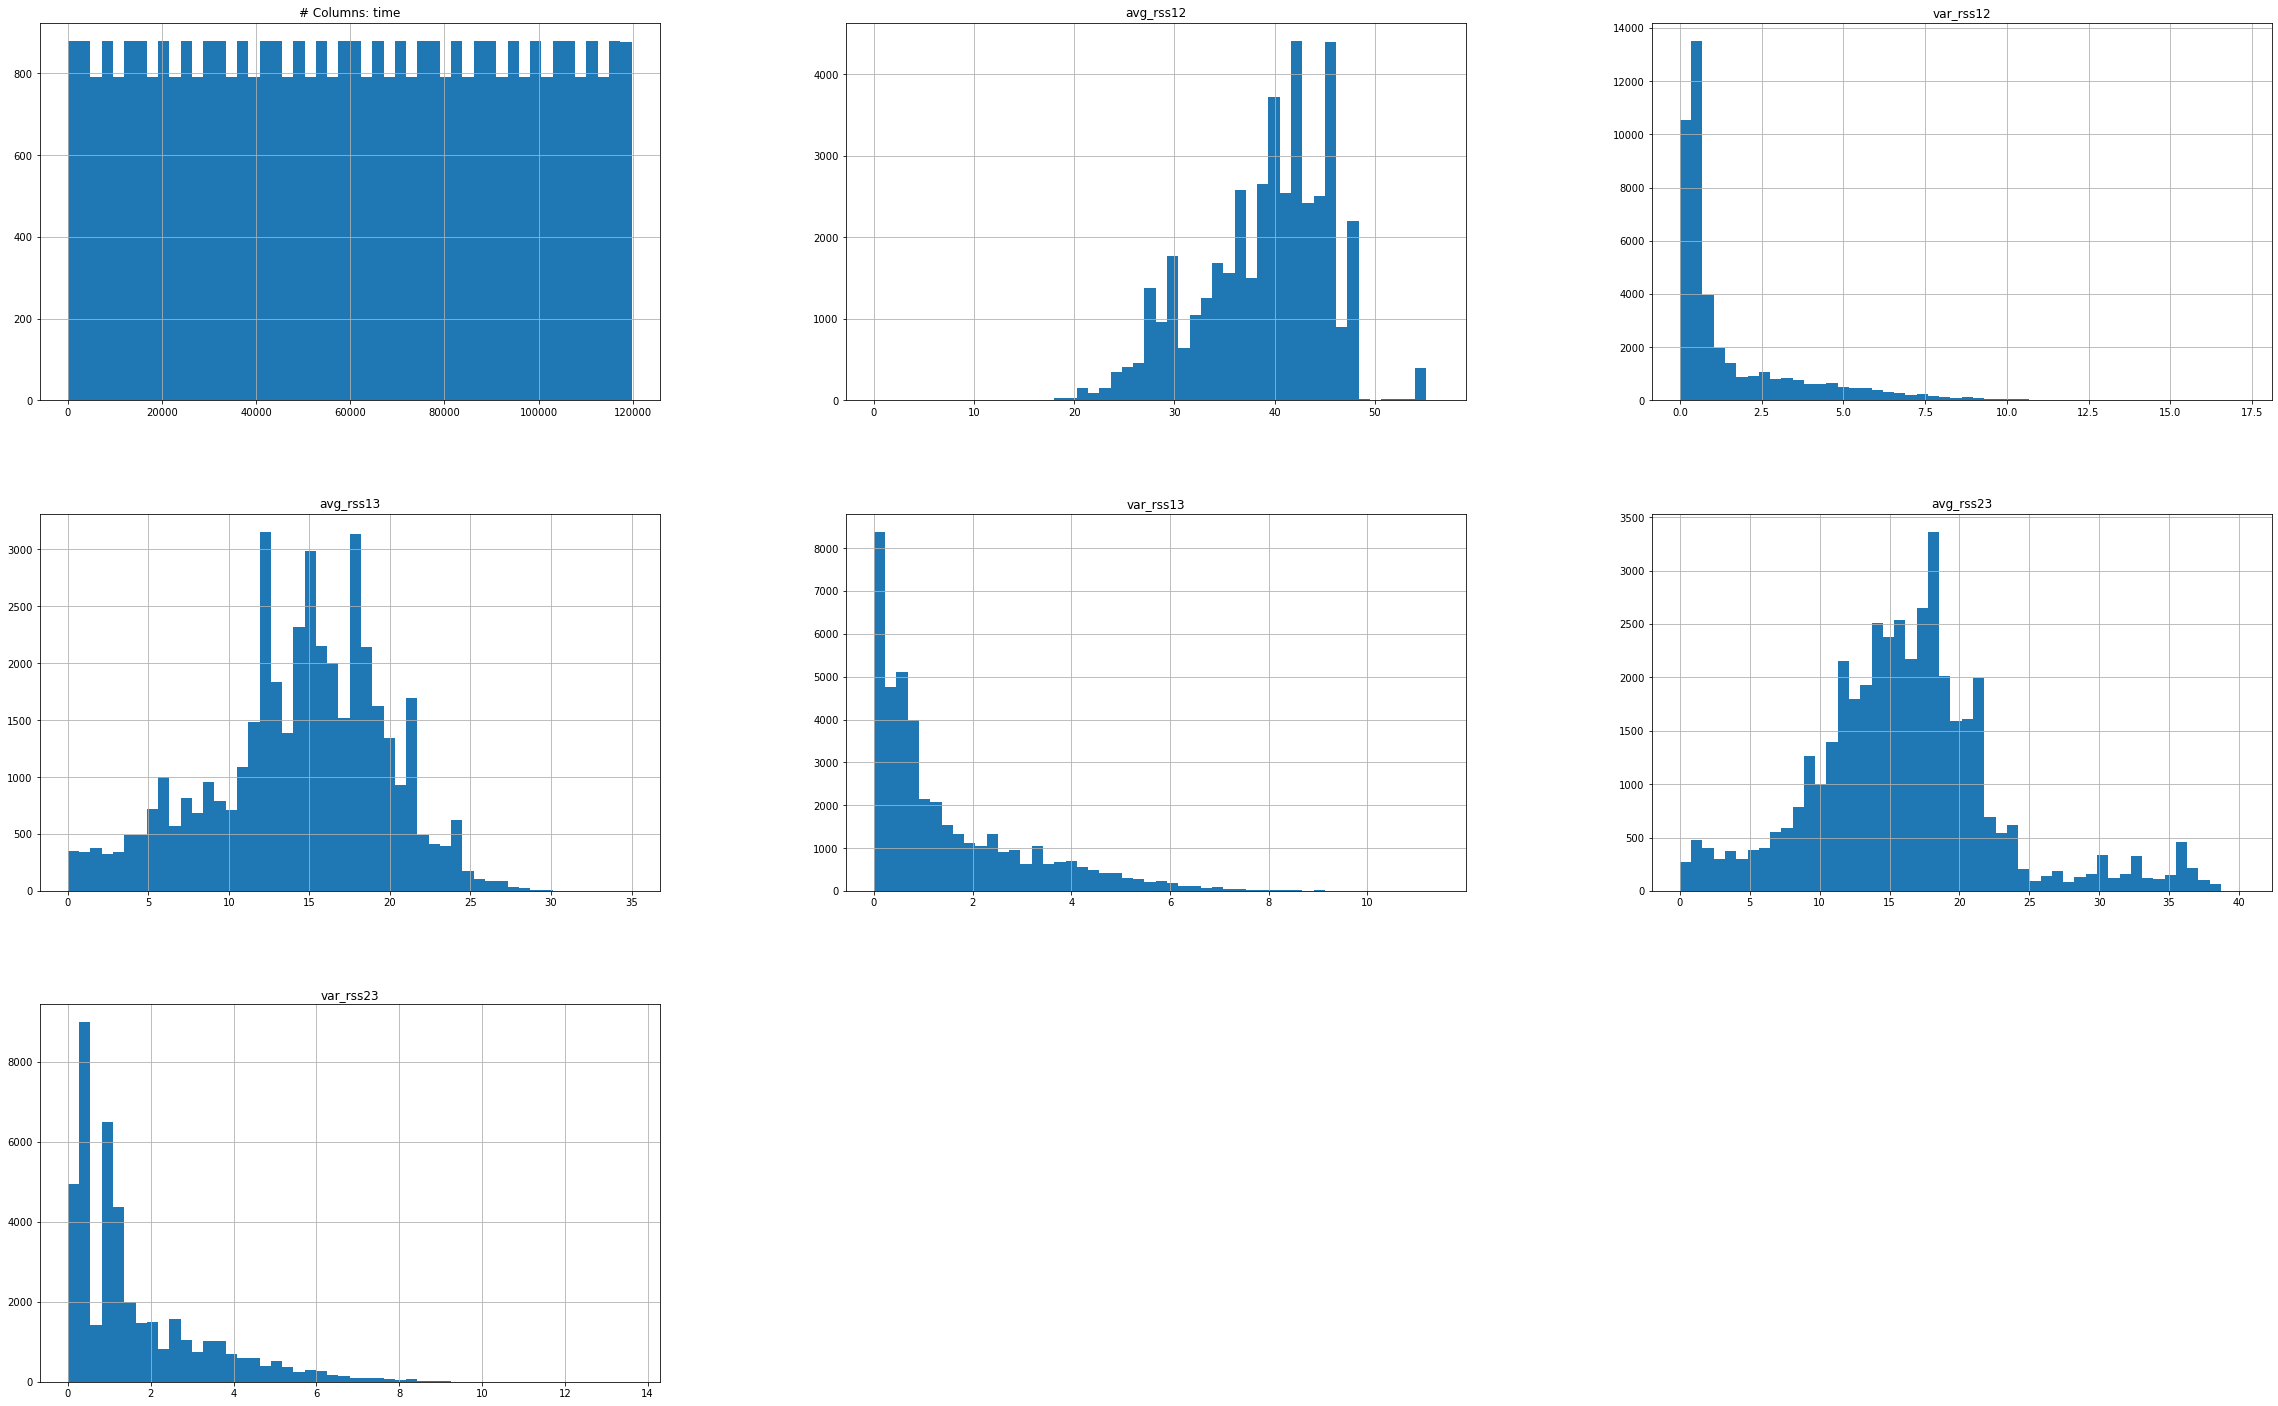

In [31]:
data.hist(bins=50, figsize=(40,25))

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42237 entries, 0 to 479
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   # Columns: time  42237 non-null  float64
 1   avg_rss12        42237 non-null  float64
 2   var_rss12        42237 non-null  float64
 3   avg_rss13        42237 non-null  float64
 4   var_rss13        42237 non-null  float64
 5   avg_rss23        42237 non-null  float64
 6   var_rss23        42237 non-null  float64
 7   col              42237 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.9+ MB


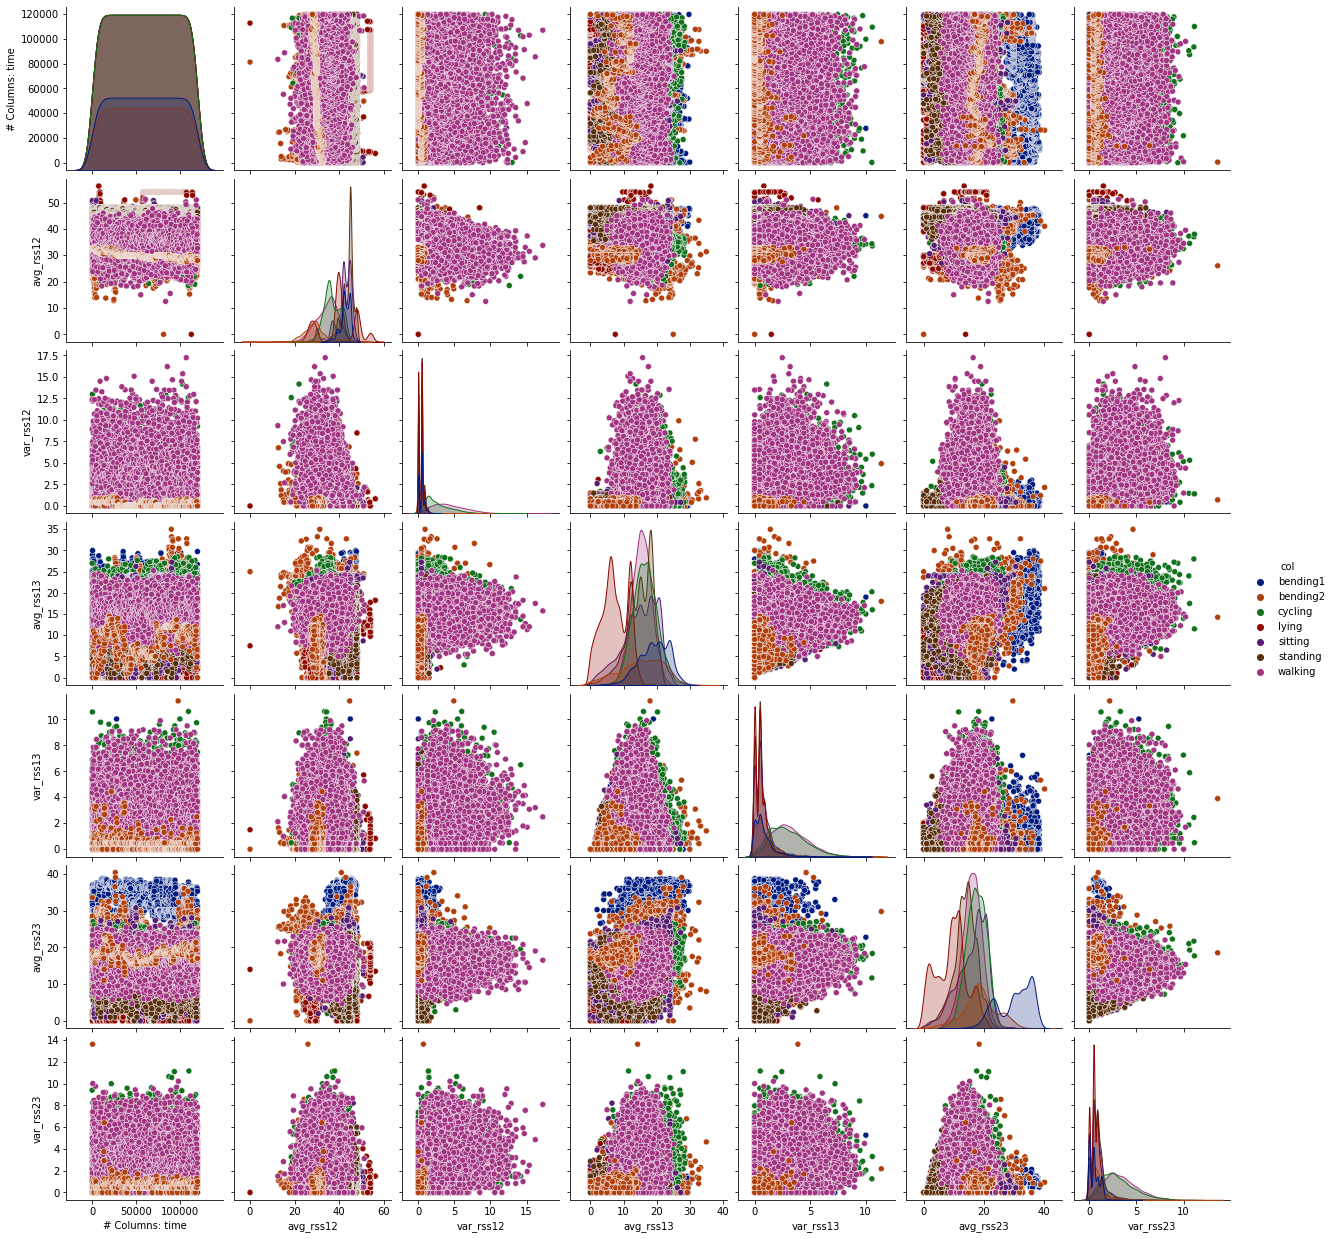

In [33]:
sns.pairplot(data, hue ="col", palette ='dark')

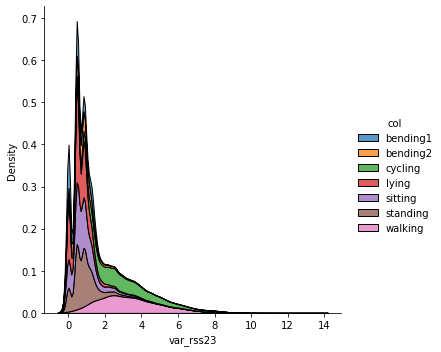

In [34]:
sns.displot(data, x="var_rss23", hue="col", kind="kde", multiple="stack")

C:\Users\Mukul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var_rss13', ylabel='Density'>

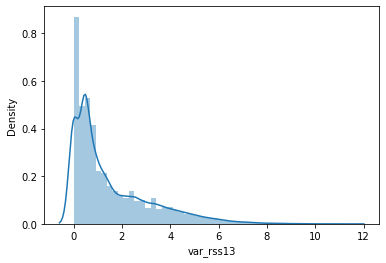

In [35]:
sns.distplot(data.var_rss13)

In [36]:
data.skew()

# Columns: time   -0.000037
avg_rss12         -0.569805
var_rss12          2.106796
avg_rss13         -0.424047
var_rss13          1.453215
avg_rss23          0.560677
var_rss23          1.579986
dtype: float64

all the variance features are highly skewed

<AxesSubplot:>

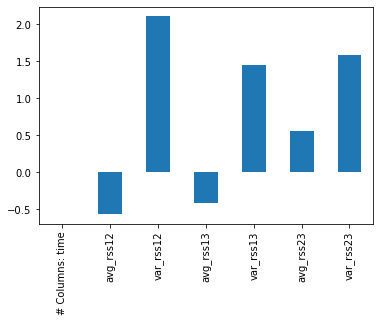

In [37]:
data.skew().plot(kind = 'bar')

In [38]:
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")
def pie_chart(feature):
    data[feature].value_counts().plot(kind="pie",figsize=(5,5))

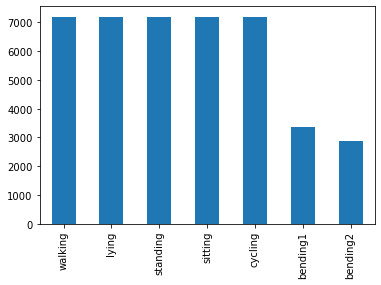

In [39]:
bar_graph("col")

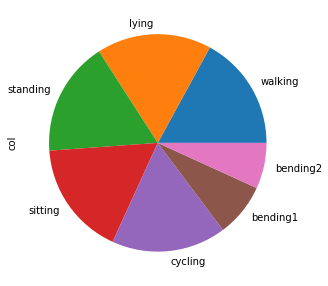

In [40]:
pie_chart('col')

<AxesSubplot:>

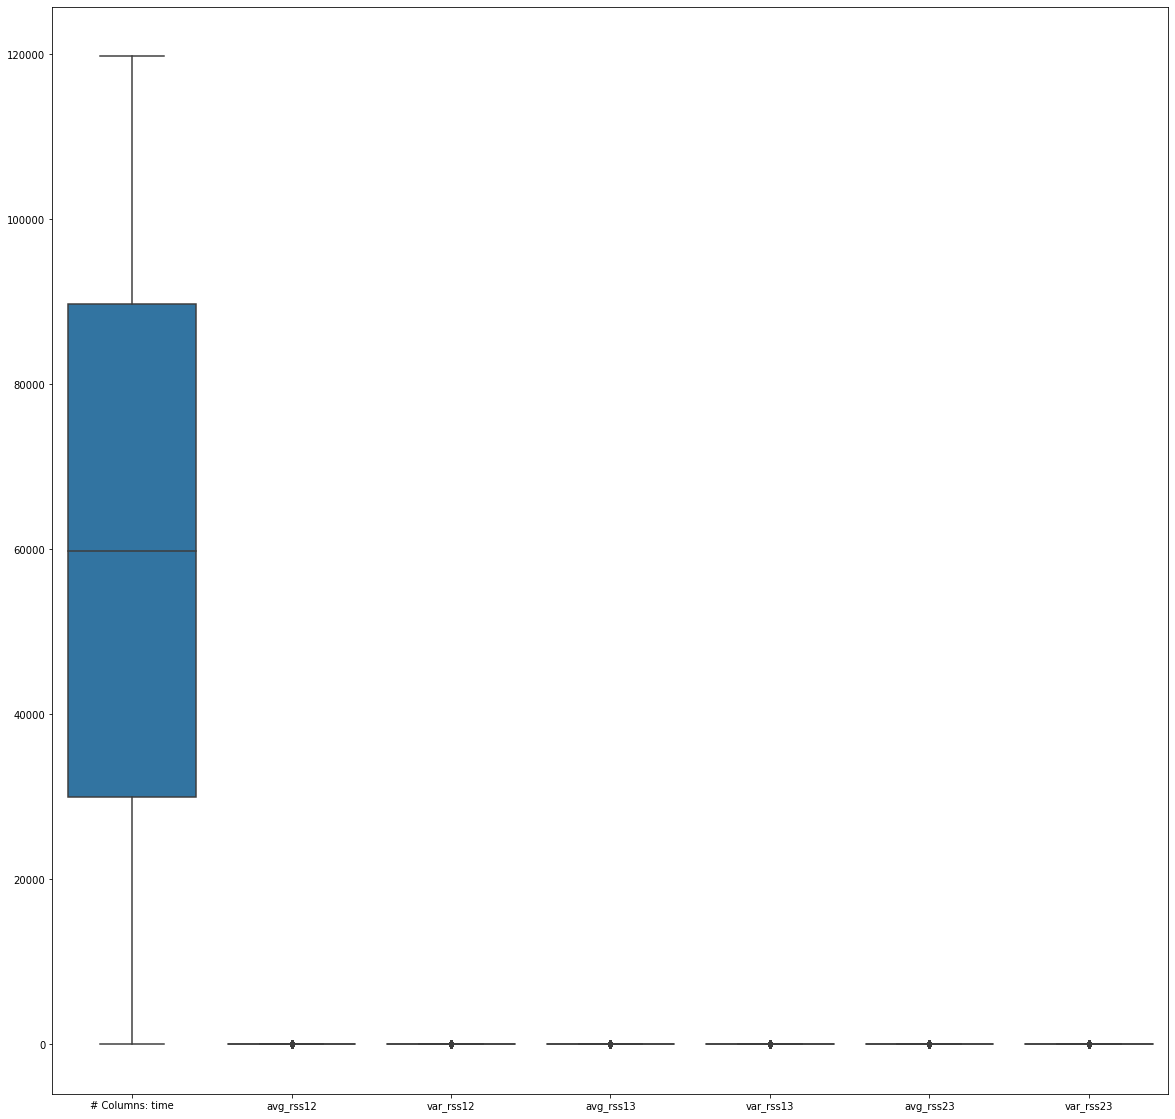

In [41]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=data,ax=ax)

In [42]:
data.to_csv(r"C:\Users\Mukul\Downloads\set1.csv")

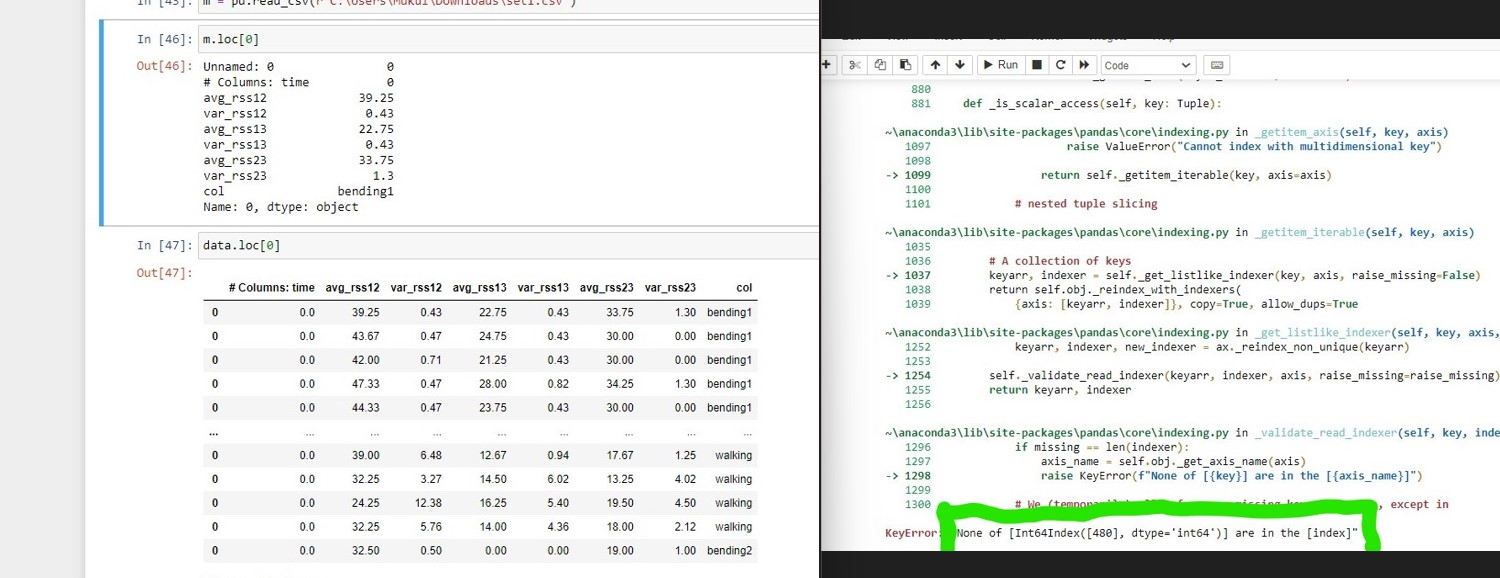

In [43]:
df = pd.read_csv(r"C:\Users\Mukul\Downloads\set1.csv")

In [44]:
plot_data = df.copy()

In [45]:
plot_data.head()

,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,col
0,0,0.0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,1,250.0,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,2,500.0,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,3,750.0,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,4,1000.0,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [46]:
plot_data.drop('col',axis = 1,inplace = True)
plot_data.drop("Unnamed: 0",axis =1,inplace = True)

In [47]:
df.drop("Unnamed: 0",axis =1,inplace = True)

In [48]:
def equalize_col(df,col_nam):
    mi = df[col_nam].min()
    ma = df[col_nam].max()
    di = (ma)-(mi)
    le = df.shape[0]-1
    for t in range(le+1):
        df.loc[[t],col_nam] = (df.loc[[t],col_nam]-mi)/(ma-mi)
    df_out = df
    return df_out
def colop(df):
    lis = []
    for x in df.columns:
        lis.append(x)
    for t in lis:   
        equalize_col(df,t)  
    return df

In [49]:
colop(plot_data)

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.000000,0.697778,0.024942,0.650000,0.037653,0.836846,0.095518
1,0.002088,0.697778,0.024942,0.657143,0.000000,0.818249,0.000000
2,0.004175,0.697778,0.024942,0.664286,0.037653,0.818249,0.000000
3,0.006263,0.702222,0.029002,0.657143,0.062172,0.818249,0.000000
4,0.008351,0.702222,0.029002,0.685714,0.000000,0.818249,0.000000
...,...,...,...,...,...,...,...
42232,0.991649,0.509689,0.027262,0.133429,0.109457,0.429705,0.034533
42233,0.993737,0.488889,0.029002,0.157143,0.218914,0.427721,0.095518
42234,0.995825,0.497778,0.000000,0.190571,0.082312,0.421522,0.073475
42235,0.997912,0.497778,0.000000,0.142857,0.071804,0.421522,0.052168


In [50]:
plot_data.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.000000,0.697778,0.024942,0.650000,0.037653,0.836846,0.095518
1,0.002088,0.697778,0.024942,0.657143,0.000000,0.818249,0.000000
2,0.004175,0.697778,0.024942,0.664286,0.037653,0.818249,0.000000
3,0.006263,0.702222,0.029002,0.657143,0.062172,0.818249,0.000000
4,0.008351,0.702222,0.029002,0.685714,0.000000,0.818249,0.000000


<AxesSubplot:>

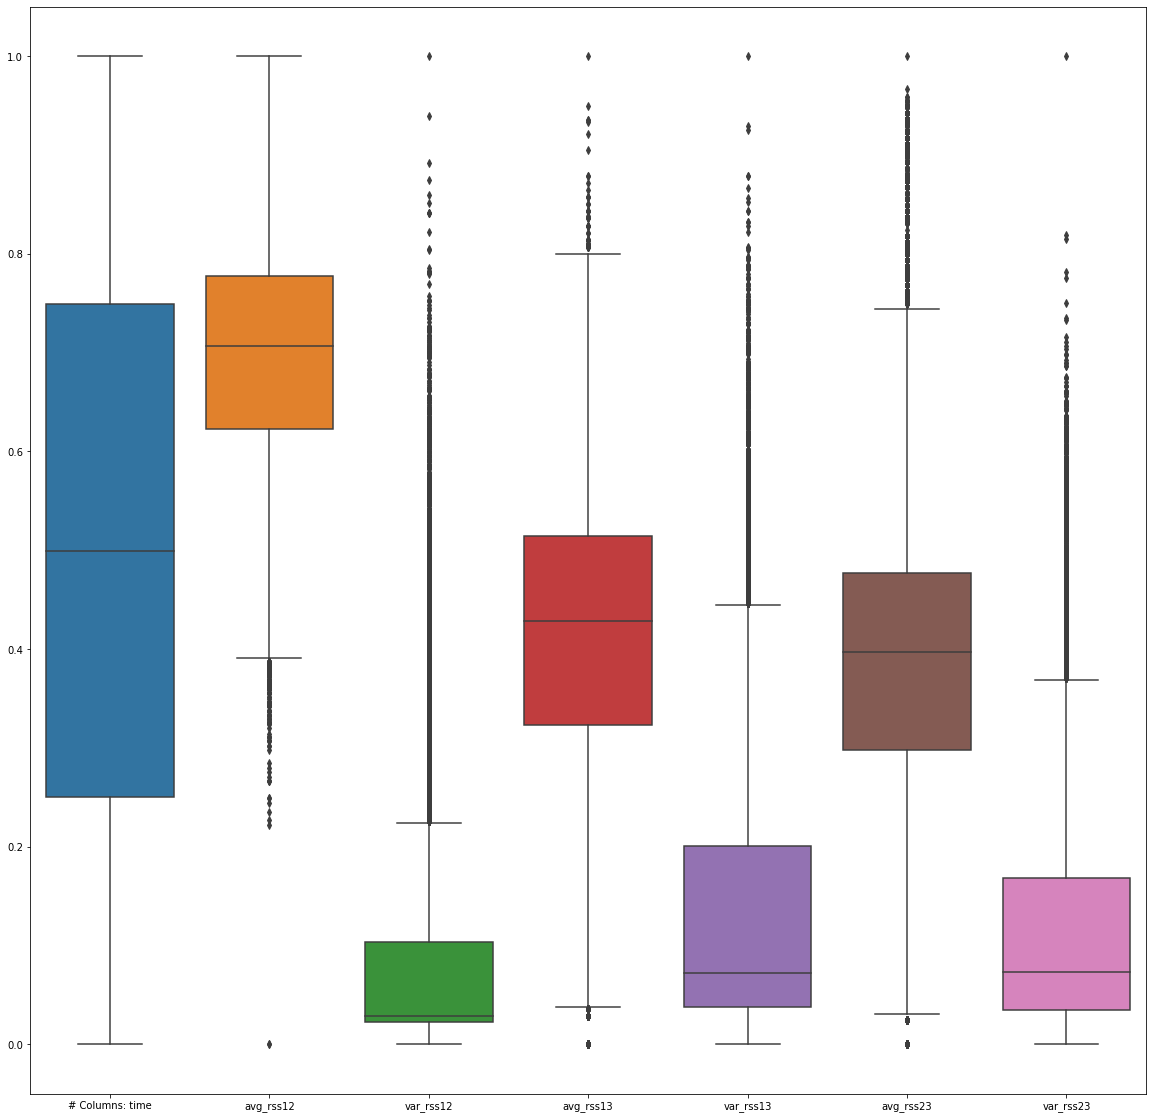

In [51]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=plot_data,ax=ax)

the range of spread of time column is quite large which makes the box plot hard to read so we are dropping it

In [52]:
plot_data.drop('# Columns: time',axis = 1,inplace = True)

<AxesSubplot:>

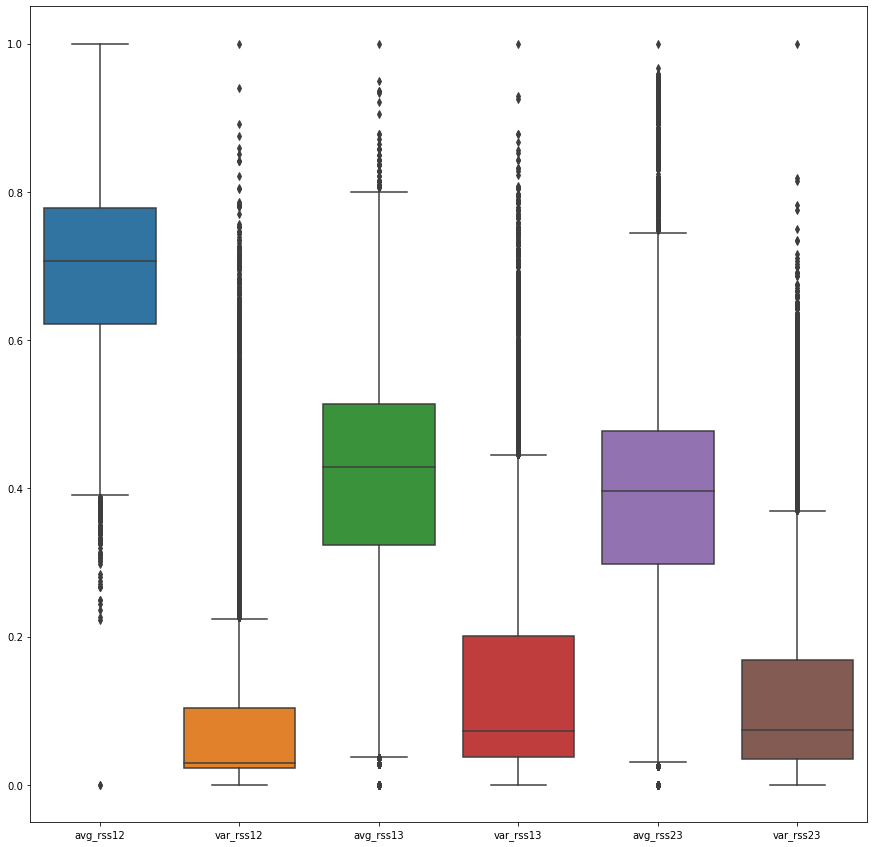

In [53]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=plot_data,ax=ax)

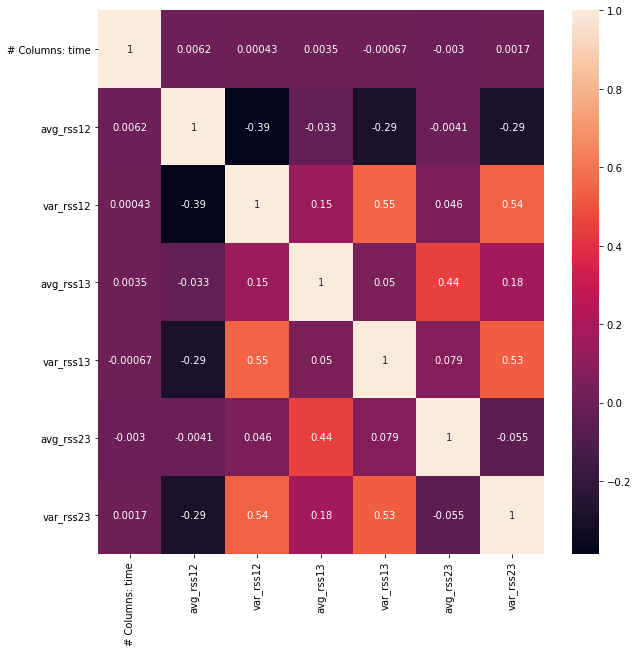

In [54]:
corrMatrix = df.corr()
f , ax = plt.subplots(figsize = (10 ,10))
sns.heatmap(corrMatrix  , annot = True)
plt.show()

# Treatment of outliers

In [55]:
q = df['avg_rss12'].quantile(0.25)
newData = df[df['avg_rss12'] >q]
q = df["var_rss12"].quantile(0.75)
newData = df[df["var_rss12"]<q]
q = df["avg_rss13"].quantile(0.90)
newData = df[df["avg_rss13"]<q]
q = df['avg_rss13'].quantile(0.10)
newData = df[df['avg_rss13'] >q]
q = df["var_rss13"].quantile(0.75)
newData = df[df["var_rss13"]<q]
q = df["avg_rss23"].quantile(0.90)
newData = df[df["avg_rss23"]<q]
q = df['avg_rss23'].quantile(0.10)
newData = df[df['avg_rss23'] >q]
q = df["var_rss23"].quantile(0.75)
newData = df[df["var_rss23"]<q]

<AxesSubplot:>

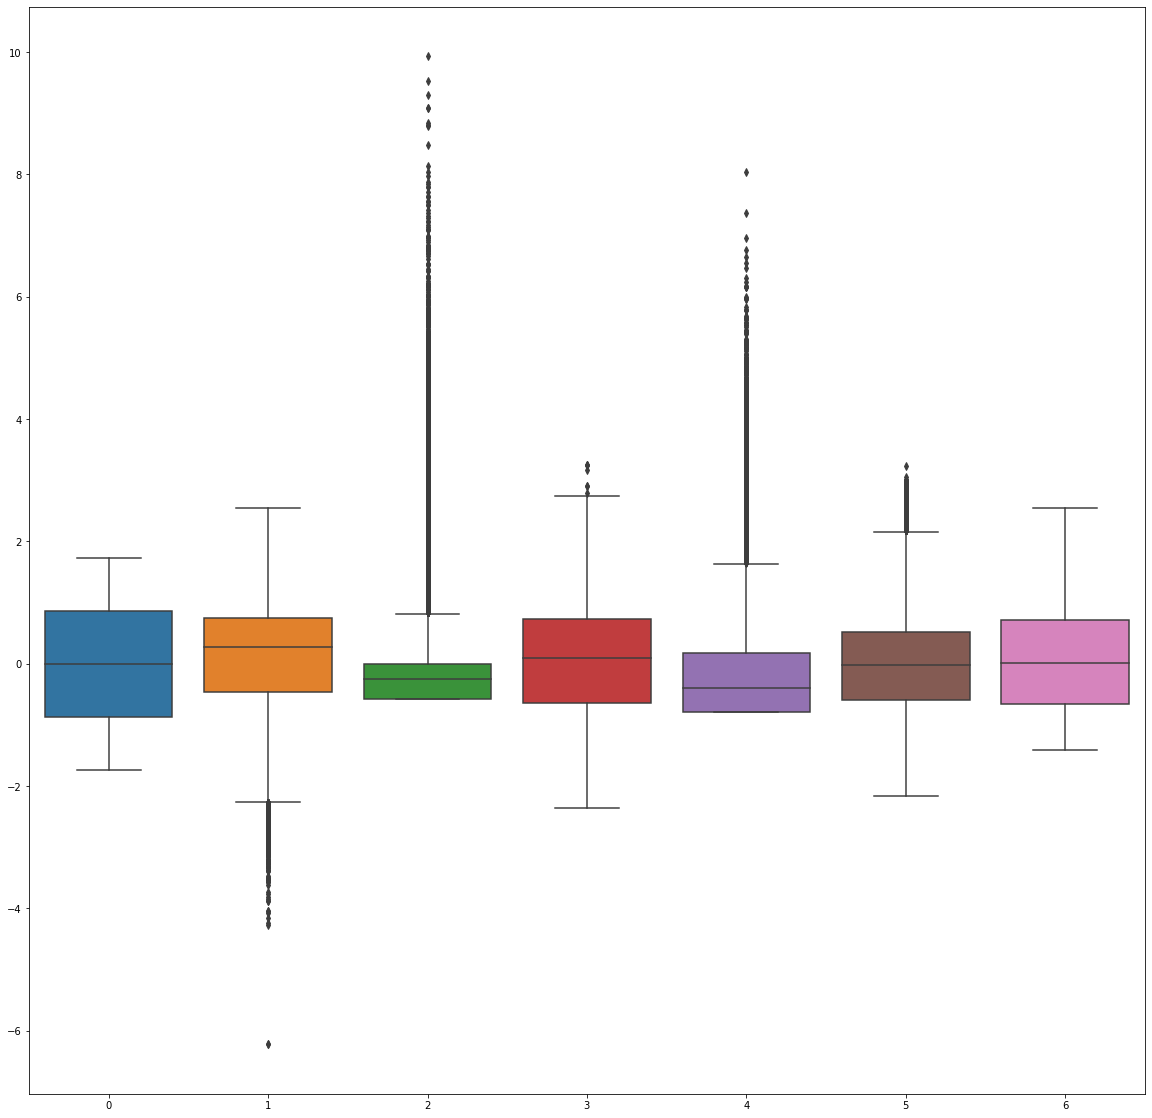

In [56]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = newData.drop(columns = 'col', axis = 1)
y = newData.col
x_scaled = scalar.fit_transform(x)
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size = .20, random_state=144,stratify=y)

In [59]:
def fit_predict(t):
    start_time = time.time()
    t.fit(x_train, y_train)
    end_time = time.time()
    print("Training time: ",end_time-start_time)
    start_time = time.time()
    y_test_predict = t.predict(x_test)
    end_time = time.time()
    print("Testing time: ",end_time-start_time)
    return y_test_predict  

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_mat(y_test,f):
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
      confusion_matrix(y_test, f))
    cmp.plot(ax=ax)
    plt.show();

In [61]:
def accuracy(y_true, y_pred):
    correct_predictions = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_predictions += 1
    print("accuracy = " + str(correct_predictions / len(y_true)))

In [62]:
from sklearn.metrics import recall_score, precision_score, f1_score
def metrics(y_test,y_pred):
    print("*********micro  *******")
    print('Recall : %.3f' % recall_score(y_test, y_pred,average='micro'))
    print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))
    print("*********macro  *******")
    print('Recall : %.3f' % recall_score(y_test, y_pred,average='macro'))
    print('Precision: %.3f' % precision_score(y_test, y_pred,average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='macro'))

In [63]:
def evaluating_model(model,actual_val):
    print("*****predicting values****")
    f = fit_predict(model)
    print()
    print("******evaluating model ****")
    accuracy(f,actual_val)
    print()
    metrics(f,actual_val)
    print()
    plot_mat(actual_val,f)
    print("********")    

In [64]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
model2 = SVC()
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=30)

# logistic regression

*****predicting values****
Training time:  0.7465662956237793
Testing time:  0.0

******evaluating model ****
accuracy = 0.6758128469468676

*********micro  *******
Recall : 0.676
Precision: 0.676
F1 Score: 0.676
*********macro  *******
Recall : 0.674
Precision: 0.668
F1 Score: 0.669



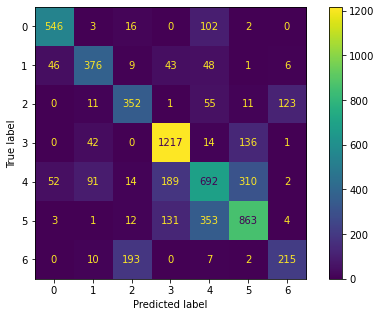

********


In [65]:
evaluating_model(model1,y_test)

# svc

*****predicting values****
Training time:  6.06258225440979
Testing time:  1.7658731937408447

******evaluating model ****
accuracy = 0.7522601110229976

*********micro  *******
Recall : 0.752
Precision: 0.752
F1 Score: 0.752
*********macro  *******
Recall : 0.754
Precision: 0.746
F1 Score: 0.747



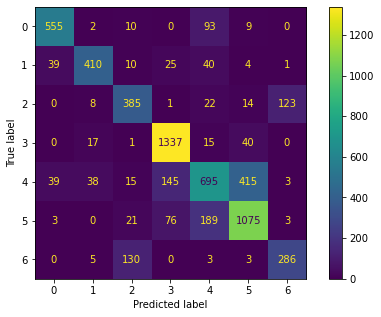

********


In [66]:
evaluating_model(model2,y_test)

hyper parameter tuning for svc

In [67]:
param = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [.1, .2, .4, .6, 1, 2, 3, 100, 200]
}
svm_gridSearch = GridSearchCV(model2, param_grid = param)

In [68]:
svm_gridSearch.fit(x_train[1:8000], y_train[1:8000])

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.6, 1, 2, 3, 100, 200],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [69]:
svm_gridSearch.best_params_
svc_new = SVC(C=100, kernel='rbf')
model3 = svc_new

# svc after hyperparameter tuning

*****predicting values****
Training time:  10.967282772064209
Testing time:  1.2851557731628418

******evaluating model ****
accuracy = 0.8042823156225218

*********micro  *******
Recall : 0.804
Precision: 0.804
F1 Score: 0.804
*********macro  *******
Recall : 0.799
Precision: 0.790
F1 Score: 0.793



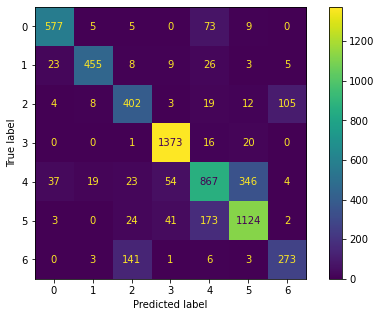

********


In [70]:
evaluating_model(model3,y_test)

# knn


*****predicting values****
Training time:  0.053633928298950195
Testing time:  0.3752708435058594

******evaluating model ****
accuracy = 0.8068199841395718

*********micro  *******
Recall : 0.807
Precision: 0.807
F1 Score: 0.807
*********macro  *******
Recall : 0.789
Precision: 0.781
F1 Score: 0.784



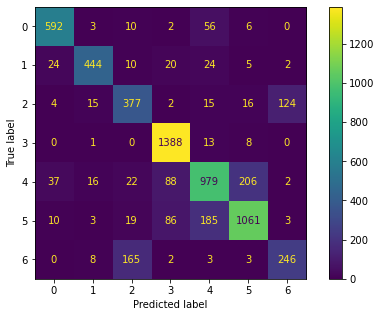

********


In [71]:
evaluating_model(model4,y_test)

In [72]:
param = {
    'n_neighbors' : [3, 5, 7, 11, 14, 16, 17, 21],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2]
    
}
grid_cv = GridSearchCV(model4, param_grid=param)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 11, 14, 16, 17, 21],
                         'p': [1, 2]})

In [73]:
grid_cv.best_params_

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1}

In [74]:
model5 = KNeighborsClassifier(algorithm = 'brute', n_neighbors= 7, p= 1)

# knn after parameter tuning

*****predicting values****
Training time:  0.0157930850982666
Testing time:  2.595696449279785

******evaluating model ****
accuracy = 0.8198255352894528

*********micro  *******
Recall : 0.820
Precision: 0.820
F1 Score: 0.820
*********macro  *******
Recall : 0.805
Precision: 0.796
F1 Score: 0.800



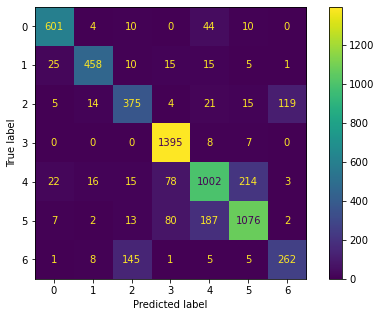

********


In [75]:
evaluating_model(model5,y_test)

# random forest

*****predicting values****
Training time:  0.8071248531341553
Testing time:  0.04232954978942871

******evaluating model ****
accuracy = 0.8588421887390959

*********micro  *******
Recall : 0.859
Precision: 0.859
F1 Score: 0.859
*********macro  *******
Recall : 0.839
Precision: 0.834
F1 Score: 0.836



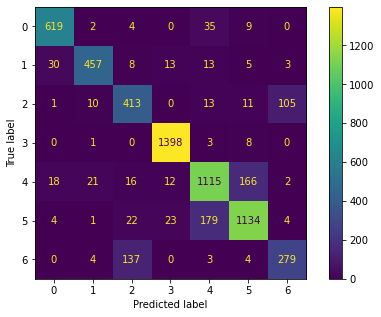

********


In [76]:
evaluating_model(model6,y_test)

parameter tuning for random forest

In [78]:
""""param = {
    'n_estimators': [1,5,10,50,100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
grid_cv_for = GridSearchCV(model6, param_grid=param)
grid_cv_for.fit(x_train, y_train)"""

'"param = {\n    \'n_estimators\': [1,5,10,50,100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]\n}\ngrid_cv_for = GridSearchCV(model6, param_grid=param)\ngrid_cv_for.fit(x_train, y_train)'

it is taking two long 